In [60]:
#Set of preliminary definitions, might add to this later

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
from io import StringIO
import io

#imported requests
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}

#defined get()
def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


In [61]:
#Refer to TASK 2 at: https://www.tng-project.org/data/docs/api/ (login required for access)

# first convert log solar masses into group catalog units
#Search for mass range
mass_min = 10**10 / 1e10 * 0.704
mass_max = 10**12 / 1e10 * 0.704

# form the search_query string by hand for once
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max)
search_query

'?mass__gt=0.704&mass__lt=70.39999999999999'

In [62]:
# form the url and make the request
url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + search_query
###filter for z=2###
subhalos = get(url)
subhalos['count']

142425

Text(0, 0.5, 'Half Mass Radius [kpc]')

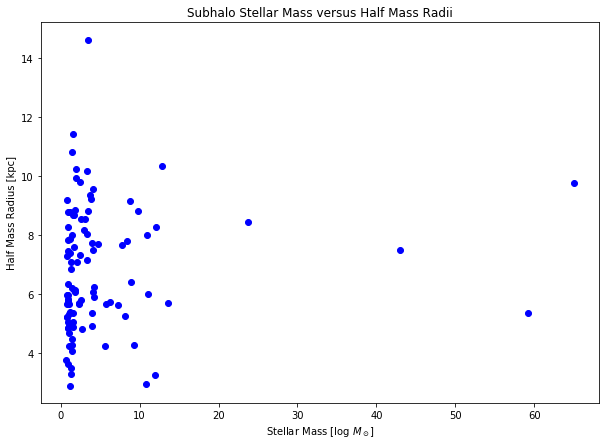

In [12]:
ids = [ subhalos['results'][i]['id'] for i in range(100) ]
#unsure how to plot more than 100 :(

#generating the plot is taking a while
plt.figure(figsize=(10,7)) # 10 is width, 7 is height

for id in ids:
    #Z=2#
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
    subhalo = get(url)
    #print(id, subhalo['mass'], subhalo['halfmassrad_stars'])
    #y-axis: (.704 * (subhalo['halfmassrad_stars'])) kpc
    plt.plot(subhalo['mass'], (.704 * (subhalo['halfmassrad_stars'])), 'bo')

plt.title('Subhalo Stellar Mass versus Half Mass Radii')
plt.xlabel('Stellar Mass [log $M_\odot$]')
plt.ylabel('Half Mass Radius [kpc]')
#I'm not sure if I did the plot right, since I'm unsure about how the units are decided on the axes

Text(0, 0.5, 'Half Mass Radius [log $r_m$]')

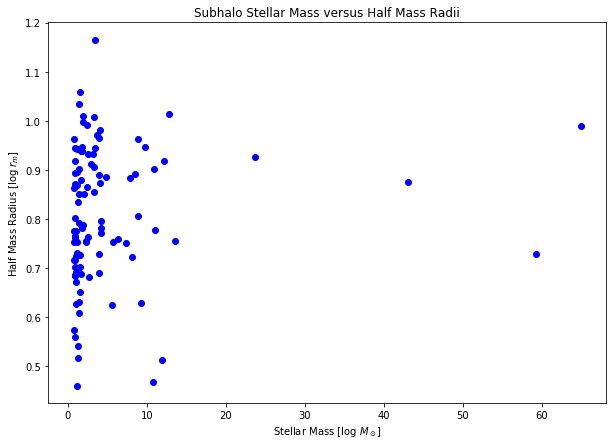

In [33]:
#generate plot with log-log x-y
plt.figure(figsize=(10,7)) # 10 is width, 7 is height

for id in ids:
    #Z=2#
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
    subhalo = get(url)
    #print(id, subhalo['mass'], subhalo['halfmassrad_stars'])
    #y-axis: (.704 * (subhalo['halfmassrad_stars'])) kpc
    plt.plot(subhalo['mass'], (np.log10(.704 * (subhalo['halfmassrad_stars']))), 'bo')

plt.title('Subhalo Stellar Mass versus Half Mass Radii')
plt.xlabel('Stellar Mass [log $M_\odot$]')
plt.ylabel('Half Mass Radius [log $r_m$]')

In [67]:
#changing limit to accommodate all selected subhalos

subhalos = get(url, {'limit':142425})
subhalos['count']

142425

In [70]:
ids2 = [ subhalos['results'][i]['id'] for i in range(1000) ]
len(ids2)

1000

HTTPError: 503 Server Error: Service Unavailable for url: https://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/26488

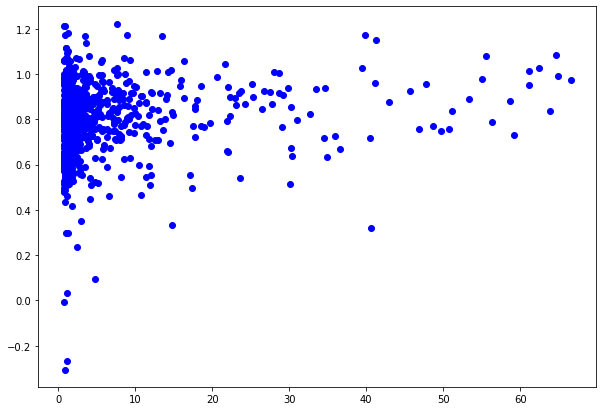

In [71]:
#plotting for 1000 ids

plt.figure(figsize=(10,7)) # 10 is width, 7 is height

for id in ids2:
    #Z=2#
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
    subhalo = get(url)
    #print(id, subhalo['mass'], subhalo['halfmassrad_stars'])
    #y-axis: (.704 * (subhalo['halfmassrad_stars'])) kpc
    plt.plot(subhalo['mass'], (np.log10(.704 * (subhalo['halfmassrad_stars']))), 'bo')

plt.title('Subhalo Stellar Mass versus Half Mass Radii')
plt.xlabel('Stellar Mass [log $M_\odot$]')
plt.ylabel('Half Mass Radius [log $r_m$]')

#It was a valiant effort from my little laptop
#I will rerun this tomorrow :)